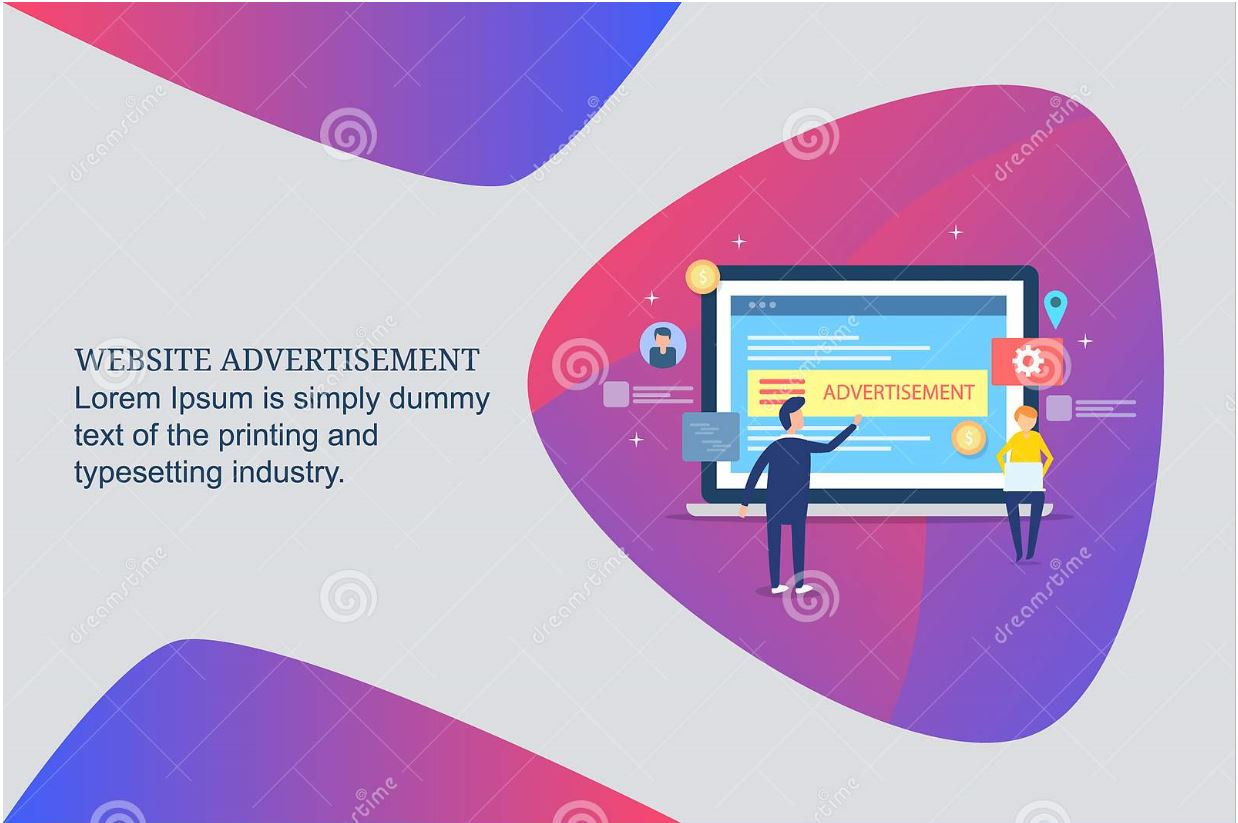

# <center> Advertising Project <center>

In this project we will be working with advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Setting Up the Default Directory

In [3]:
import os
os.chdir(r'C:\Users\dell\Desktop\Python Project\Project')
os.getcwd()

'C:\\Users\\dell\\Desktop\\Python Project\\Project'

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [4]:
ad_data_train = pd.read_csv('advertising_train.csv')
ad_data_test = pd.read_csv('advertising_test.csv')

In [5]:
ad_data_train['source']='ad_data_train'
ad_data_test['source']='ad_data_test'
ad_data=pd.concat([ad_data_train,ad_data_test],ignore_index=True ,sort =True)
ad_data_train.shape, ad_data_test.shape,ad_data.shape

((1000, 11), (200, 10), (1200, 11))

In [5]:
ad_data.head(15)

,Ad Topic Line,Age,Area Income,City,Clicked on Ad,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp,source
0,Cloned 5thgeneration orchestration,35,61833.90,Wrightburgh,0.0,Tunisia,256.09,68.95,0,2016-03-27 00:53:11,ad_data_train
1,Monitored national standardization,31,68441.85,West Jodi,0.0,Nauru,193.77,80.23,1,2016-04-04 01:39:02,ad_data_train
2,Organic bottom-line service-desk,26,59785.94,Davidton,0.0,San Marino,236.50,69.47,0,2016-03-13 20:35:42,ad_data_train
3,Triple-buffered reciprocal time-frame,29,54806.18,West Terrifurt,0.0,Italy,245.89,74.15,1,2016-01-10 02:31:19,ad_data_train
4,Robust logistical utilization,35,73889.99,South Manuel,0.0,Iceland,225.58,68.37,0,2016-06-03 03:36:18,ad_data_train
5,Sharable client-driven software,23,59761.56,Jamieberg,0.0,Norway,226.74,59.99,1,2016-05-19 14:30:17,ad_data_train
6,Enhanced dedicated support,33,53852.85,Brandonstad,0.0,Myanmar,208.36,88.91,0,2016-01-28 20:59:32,ad_data_train
7,Reactive local challenge,48,24593.33,Port Jefferybury,1.0,Australia,131.76,66.00,1,2016-03-07 01:40:15,ad_data_train
8,Configurable coherent function,30,68862.00,West Colin,0.0,Grenada,221.51,74.53,1,2016-04-18 09:33:42,ad_data_train
9,Mandatory homogeneous architecture,20,55642.32,Ramirezton,0.0,Ghana,183.82,69.88,1,2016-07-11 01:42:51,ad_data_train


In [6]:
ad_data

,Ad Topic Line,Age,Area Income,City,Clicked on Ad,Country,Daily Internet Usage,Daily Time Spent on Site,Male,Timestamp,source
0,Cloned 5thgeneration orchestration,35,61833.90,Wrightburgh,0.0,Tunisia,256.09,68.95,0,2016-03-27 00:53:11,ad_data_train
1,Monitored national standardization,31,68441.85,West Jodi,0.0,Nauru,193.77,80.23,1,2016-04-04 01:39:02,ad_data_train
2,Organic bottom-line service-desk,26,59785.94,Davidton,0.0,San Marino,236.50,69.47,0,2016-03-13 20:35:42,ad_data_train
3,Triple-buffered reciprocal time-frame,29,54806.18,West Terrifurt,0.0,Italy,245.89,74.15,1,2016-01-10 02:31:19,ad_data_train
4,Robust logistical utilization,35,73889.99,South Manuel,0.0,Iceland,225.58,68.37,0,2016-06-03 03:36:18,ad_data_train
...,...,...,...,...,...,...,...,...,...,...,...
1195,Face-to-face even-keeled website,32,51633.34,Kentmouth,NaN,Senegal,116.53,71.86,0,5/17/2016 6:14,ad_data_test
1196,Extended context-sensitive monitoring,45,63363.04,West Casey,NaN,Suriname,137.24,44.78,1,7/9/2016 11:04,ad_data_test
1197,Exclusive client-driven model,36,64045.93,East Henry,NaN,Liberia,239.32,78.57,1,3/27/2016 2:35,ad_data_test
1198,Profound executive flexibility,31,73049.30,Hollyfurt,NaN,Guam,201.26,73.41,1,1/16/2016 8:01,ad_data_test


In [7]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ad Topic Line             1200 non-null   object 
 1   Age                       1200 non-null   int64  
 2   Area Income               1200 non-null   float64
 3   City                      1200 non-null   object 
 4   Clicked on Ad             1000 non-null   float64
 5   Country                   1200 non-null   object 
 6   Daily Internet Usage      1200 non-null   float64
 7   Daily Time Spent on Site  1200 non-null   float64
 8   Male                      1200 non-null   int64  
 9   Timestamp                 1200 non-null   object 
 10  source                    1200 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 103.2+ KB


In [8]:
ad_data.columns

Index(['Ad Topic Line', 'Age', 'Area Income', 'City', 'Clicked on Ad',
       'Country', 'Daily Internet Usage', 'Daily Time Spent on Site', 'Male',
       'Timestamp', 'source'],
      dtype='object')

In [9]:
ad_data.shape

(1200, 11)

In [10]:
ad_data_train=ad_data_train.drop_duplicates()
ad_data_train['source']='ad_data_train'
ad_data_test['source']='ad_data_test'
ad_data_nodup=pd.concat([ad_data_train,ad_data_test],ignore_index=True ,sort =True)
print(ad_data.shape,ad_data_nodup.shape,'\n Number of duplicate data : ',ad_data.shape[0]-ad_data_nodup.shape[0])


(1200, 11) (1200, 11) 
 Number of duplicate data :  0


**Finding the missing values**

In [11]:
ad_data.apply(lambda x: sum(x.isnull()))

Ad Topic Line                 0
Age                           0
Area Income                   0
City                          0
Clicked on Ad               200
Country                       0
Daily Internet Usage          0
Daily Time Spent on Site      0
Male                          0
Timestamp                     0
source                        0
dtype: int64

In [12]:
ad_data.isnull().sum()

Ad Topic Line                 0
Age                           0
Area Income                   0
City                          0
Clicked on Ad               200
Country                       0
Daily Internet Usage          0
Daily Time Spent on Site      0
Male                          0
Timestamp                     0
source                        0
dtype: int64

<AxesSubplot:>

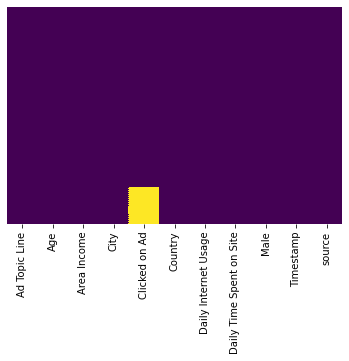

In [13]:
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**As this dataset contains no missing values, we don't need to do any data cleaning as well as handling missing values - But the missing values displayed in Column Clicked on Ad are due merging of Train and Test Dataset which can be ignored**

### Descriptive Analysis or Statistical summary of the dataset

In [14]:
# Find the Unique Values
#Method-1
ad_data.apply(lambda x: len(x.unique()))

Ad Topic Line               1000
Age                           43
Area Income                 1000
City                         969
Clicked on Ad                  3
Country                      237
Daily Internet Usage         966
Daily Time Spent on Site     900
Male                           2
Timestamp                   1200
source                         2
dtype: int64

In [15]:
#finding unique values, mode and fequency of mode
#Method 2
ad_data.astype('object').describe().transpose()

,count,unique,top,freq
Ad Topic Line,1200,1000,Polarized tangible collaboration,2
Age,1200,43,31,76
Area Income,1200,1000,47861.9,2
City,1200,969,Benjaminchester,4
Clicked on Ad,1000,2,1,500
Country,1200,237,Burundi,11
Daily Internet Usage,1200,966,158.22,4
Daily Time Spent on Site,1200,900,43.67,4
Male,1200,2,0,629
Timestamp,1200,1200,2016-03-15 03:12:25,1


In [16]:
ad_data.describe()

,Age,Area Income,Clicked on Ad,Daily Internet Usage,Daily Time Spent on Site,Male
count,1200.000000,1200.000000,1000.00000,1200.000000,1200.000000,1200.000000
mean,36.113333,55006.041275,0.50000,179.421867,64.890425,0.475833
std,8.879068,13463.572187,0.50025,43.710988,15.821494,0.499624
min,19.000000,13996.500000,0.00000,104.780000,32.600000,0.000000
25%,29.000000,46971.640000,0.00000,138.647500,50.742500,0.000000
50%,35.000000,57228.185000,0.50000,181.680000,68.145000,0.000000
75%,42.000000,65228.125000,1.00000,217.665000,78.380000,1.000000
max,61.000000,79484.800000,1.00000,269.960000,91.430000,1.000000


In [17]:
ad_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.113333,8.879068,19.00,29.0000,35.000,42.000,61.00
Area Income,1200.0,55006.041275,13463.572187,13996.50,46971.6400,57228.185,65228.125,79484.80
Clicked on Ad,1000.0,0.500000,0.500250,0.00,0.0000,0.500,1.000,1.00
Daily Internet Usage,1200.0,179.421867,43.710988,104.78,138.6475,181.680,217.665,269.96
Daily Time Spent on Site,1200.0,64.890425,15.821494,32.60,50.7425,68.145,78.380,91.43
Male,1200.0,0.475833,0.499624,0.00,0.0000,0.000,1.000,1.00


# <center> Exploratory Data Analysis <center>

**UNIVARIATE AND BIVARIATE ANAYSIS**

**Correlation Matrix & Heat Map**

<AxesSubplot:>

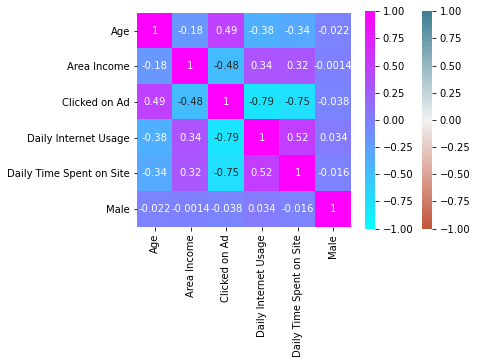

In [18]:
corr_ad_data = ad_data.corr()

subplt = sns.heatmap(
        corr_ad_data,
        vmin=-1 , vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
        )
sns.heatmap(corr_ad_data, vmin = -1, vmax = 1, annot = True, cmap= 'cool')

In [19]:
Clicked_on_Ads=ad_data['Clicked on Ad'].value_counts()
Clicked_on_Ads

1.0    500
0.0    500
Name: Clicked on Ad, dtype: int64

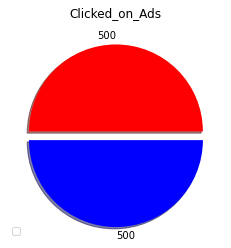

In [20]:
#Pie chart

values = [Clicked_on_Ads[0],Clicked_on_Ads[1]]
colors = ['b', 'r']
labels = ['NO','YES']
explode = (0.1, 0)
plt.title('Clicked_on_Ads')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels= values,explode=explode,
        counterclock=False, shadow=True)

plt.show()

Text(0.5, 1, 'Class counts')

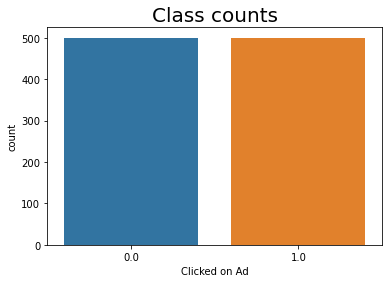

In [21]:
#countplot
sns.countplot(ad_data['Clicked on Ad'])
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

Using seaborn to explore the data!

** Creating a histogram of the Age**

Text(0.5, 0, 'Age')

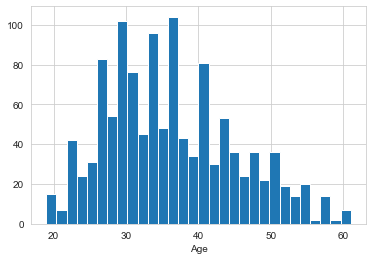

In [22]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

Text(0.5, 0, 'Area Income')

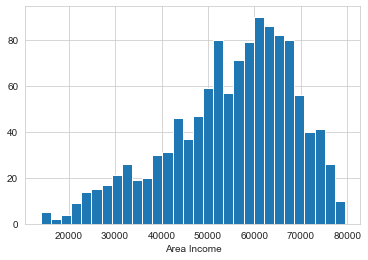

In [23]:
sns.set_style('whitegrid')
ad_data['Area Income'].hist(bins=30)
plt.xlabel('Area Income')

<AxesSubplot:xlabel='Age', ylabel='Density'>

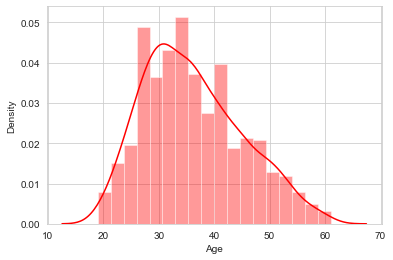

In [24]:
sns.set_style("whitegrid")
sns.distplot(ad_data.Age, color="Red")

In [25]:
sns.barplot(x=train["Weekly_Sales"],y=train["Type"])

NameError: name 'train' is not defined

Text(0.5, 1, 'Class counts')

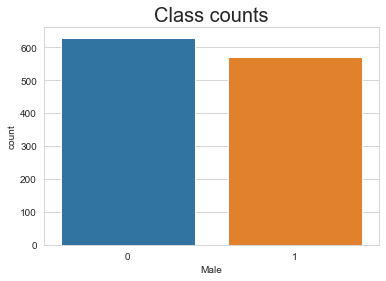

In [26]:
#countplot
sns.countplot(ad_data['Male'])
plt.title("Class counts", y=1, fontdict={"fontsize": 20})

In [27]:
gender=ad_data['Male'].value_counts()
gender

0    629
1    571
Name: Male, dtype: int64

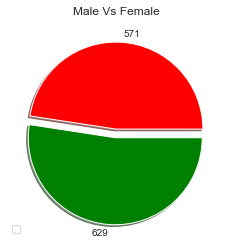

In [28]:
values = [gender[0],gender[1]]
colors = ['g', 'r']
labels = ['Male','Female']
explode = (0.1, 0)
plt.title('Male Vs Female')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels= values,explode=explode,
        counterclock=False, shadow=True)

plt.show()

# OUTLIER ANALYSIS

<AxesSubplot:xlabel='Age'>

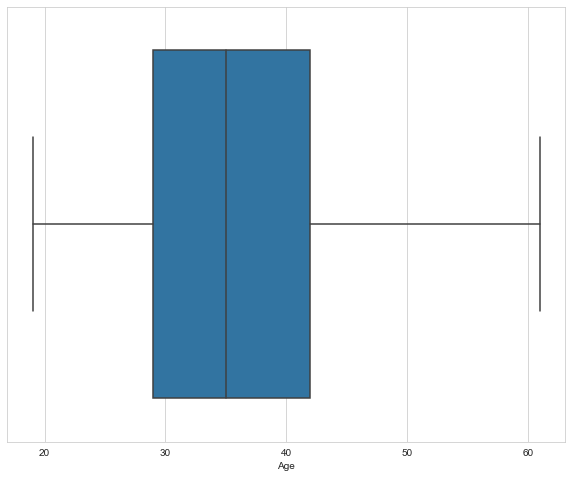

In [29]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=ad_data['Age'],ax=ax)

<AxesSubplot:xlabel='Area Income'>

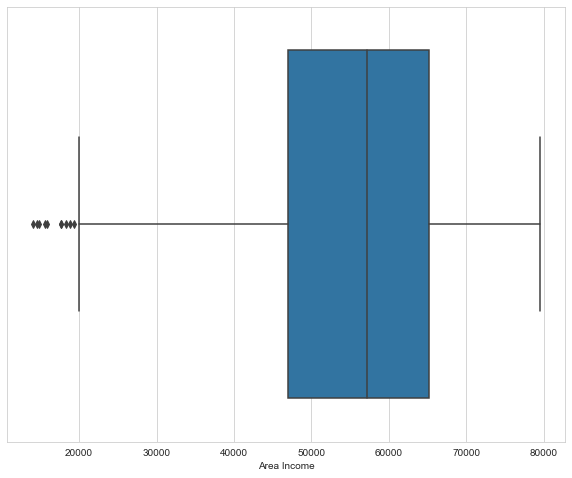

In [30]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=ad_data['Area Income'],ax=ax)

<AxesSubplot:xlabel='Daily Internet Usage'>

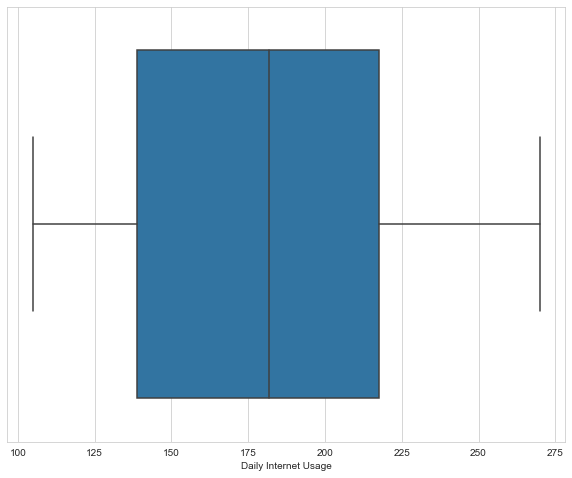

In [31]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=ad_data['Daily Internet Usage'],ax=ax)

<AxesSubplot:xlabel='Daily Time Spent on Site'>

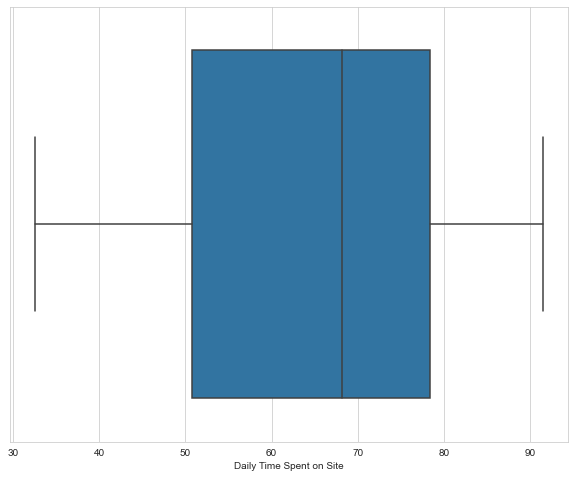

In [32]:
f,ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=ad_data['Daily Time Spent on Site'],ax=ax)

**Creating a jointplot showing Area Income versus Age.**

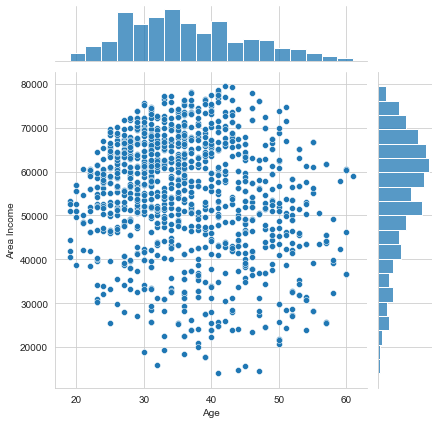

In [33]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Creating a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

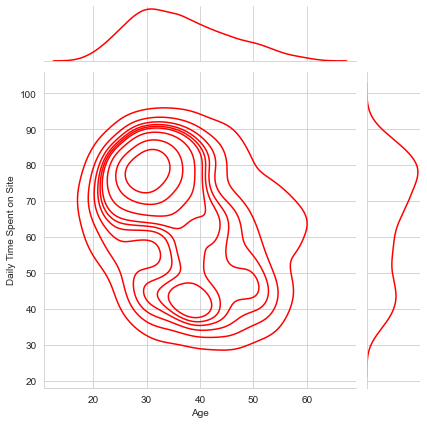

In [34]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde',color='red');

**Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

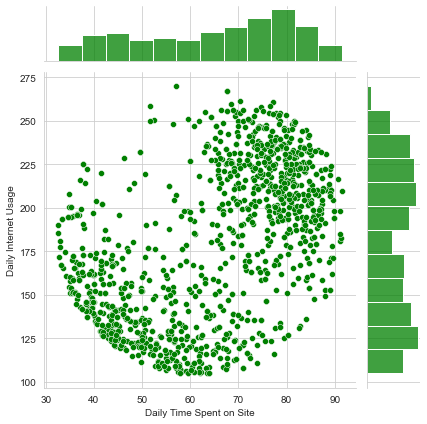

In [35]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

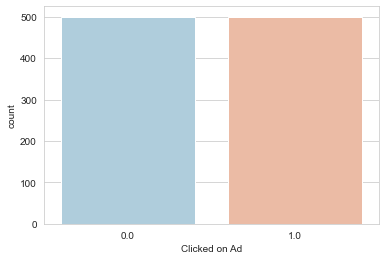

In [36]:
sns.set_style('whitegrid')
sns.countplot(x='Clicked on Ad',data=ad_data,palette='RdBu_r')

**Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

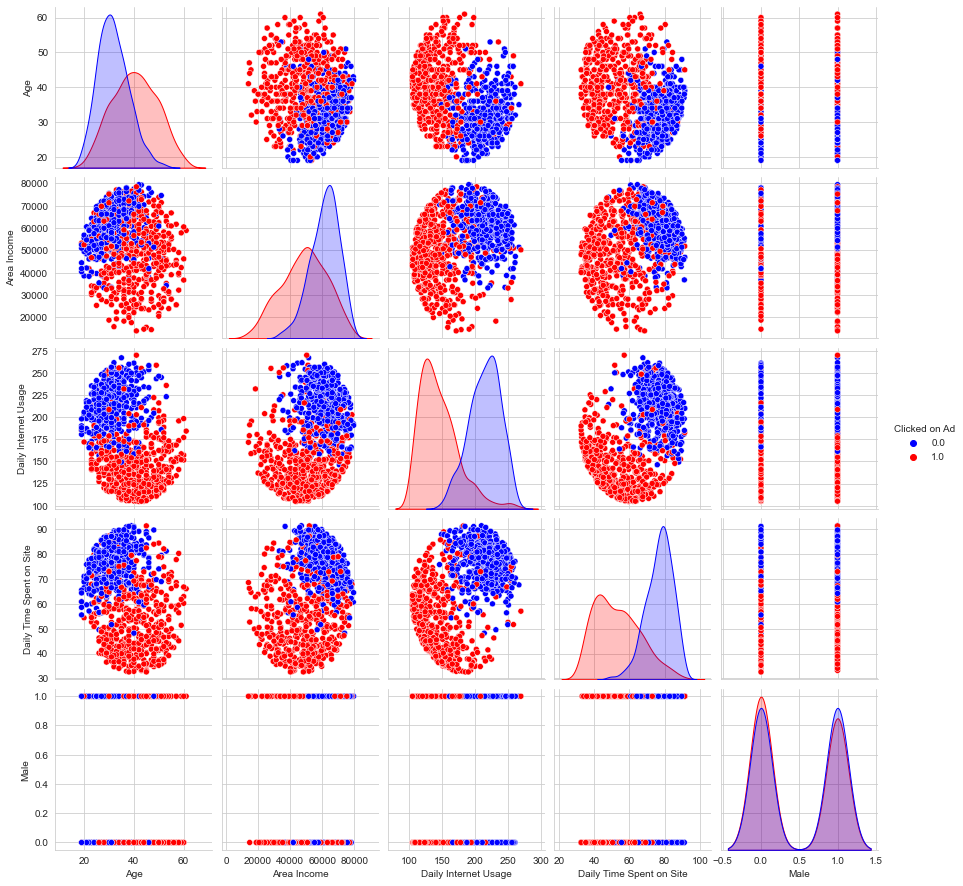

In [37]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another advertising_test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

**Split the data into training set and testing set using train_test_split**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = ad_data_train[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data_train['Clicked on Ad']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

**Train and fit a logistic regression model on the training set.**

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
**Now predict values for the testing data.**

In [43]:
y_pred = reg.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1], d

**Create a classification report for the model.**

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       164
           1       0.96      0.96      0.96       136

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [46]:
print(confusion_matrix(y_test,y_pred))

[[159   5]
 [  5 131]]


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg,X,y,cv=4)

array([0.92 , 0.868, 0.932, 0.952])

In [49]:
# Checking the mean  value of the scores of k-fold as same as above code
cross_val_score(reg,X,y,cv=4).mean()

0.918

# <center> ***K-Nearest Neighbors (K-NN)***<center>

**Training the K-NN model on the Training set**

In [50]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Prediction and Evaluation 

In [51]:
pred = knn.predict(X_test)

**Classification Report**

In [52]:
from sklearn.metrics import classification_report
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.68      0.69       164
           1       0.62      0.64      0.63       136

    accuracy                           0.66       300
   macro avg       0.66      0.66      0.66       300
weighted avg       0.66      0.66      0.66       300



**Making the Confusion Matrix**

In [53]:
print(confusion_matrix(y_test,pred))

[[111  53]
 [ 49  87]]


**Accuracy**

In [54]:
accuracy_score(y_test, pred)

0.66

**k-fold score**

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=4) 
cross_val_score(knn, X,y,cv=4).mean()

0.702

# <center>Random Forest Classification

**Training the Random Forest Classification model on the Training set**


In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

## Prediction and Evaluation 

In [57]:
rfc_pred = rfc.predict(X_test)

**Classification Report**

In [58]:
from sklearn.metrics import classification_report
print (classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       164
           1       0.94      0.95      0.95       136

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**The Confusion Matrix**

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,rfc_pred))

[[156   8]
 [  7 129]]


**Accuracy**

In [60]:
accuracy_score(y_test, rfc_pred)

0.95

# <center>SUPPORT VECTOR MACHINE-SVM

**Training the SVM model on the Training set**

In [61]:
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

## Prediction and Evaluation 

In [62]:
predictions = svc_model.predict(X_test)

**The Confusion Matrix**

In [63]:
print(confusion_matrix(y_test,predictions))

[[158   6]
 [  5 131]]


**Classification Report**

In [64]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       164
           1       0.96      0.96      0.96       136

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



**Accuracy**

In [65]:
accuracy_score(y_test, predictions)

0.9633333333333334

## Decision Trees

Training a single decision tree.

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction and Evaluation 

Evaluate our decision tree.

In [67]:
predictions_dtree = dtree.predict(X_test)

**Classification Report**

In [68]:
print(classification_report(y_test,predictions_dtree))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       164
           1       0.89      0.94      0.91       136

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



**The Confusion Matrix**

In [69]:
print(confusion_matrix(y_test,predictions_dtree))

[[148  16]
 [  8 128]]


**Accuracy**

In [70]:
accuracy_score(y_test, predictions_dtree)

0.92

# <center> THANK YOU